<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Clasificación con Python</font></h1>


En este cuaderno trataremos de practicar todos los algoritmos de clasificación aprendidos durante el curso.

Cargaremos un conjunto de datos mediante la librería Pandas, aplicaremos los siguientes algoritmos y encontraremos el mejor para este conjunto en específico con métodos precisos de evaluación.

Cargemos primero las librerías necesarias:


In [42]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
%matplotlib inline

### Acerca del conjunto de datos


Este conjunto de datos es sobre prestamos pasados. El conjunto **Loan_train.csv** incluye detalles sobre 346 clientes cuyos prestamos estan pagados o pendientes de cobrar.

| Campo          | Descripción                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | El prestamos puede estar pagado o pendiente                                           |
| Principal      | Cantidad del prestamo principal                                                       |
| Terms          | Términos del cobro del prestamo, que pueden ser semanales, quincenales o mensuales    |
| Effective_date | La fecha cuando el prestamo fue creado                                                |
| Due_date       | Debido a que se programa para pagarse una sola vez, solo hay una fecha de vencimiento |
| Age            | Edad del solicitante                                                                  |
| Education      | Escolaridad del solicitante                                                           |
| Gender         | Genero del solicitante                                                                |


In [2]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [3]:
import wget

Descargemos el conjunto de datos


In [41]:
loan_train = wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')    

100% [..............................................................................] 23101 / 23101

### Cargar datos desde el archivo CSV


In [5]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
df.shape

(346, 10)

### Convertir a un objeto de tipo fecha(date)/tiempo(time)


In [7]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Visualización de los Datos y pre procesamiento


Veamos cuantas de cada clase existen en el conjunto de datos.


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 personas han saldado el préstamo a tiempo, mientras 86 han sido llamados a pagar


Grafiquemos algunas columnas para entender mejor los datos:


In [9]:
# observación: la instalación de seaborn puede tomar algunos minutos
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

# All requested packages already installed.



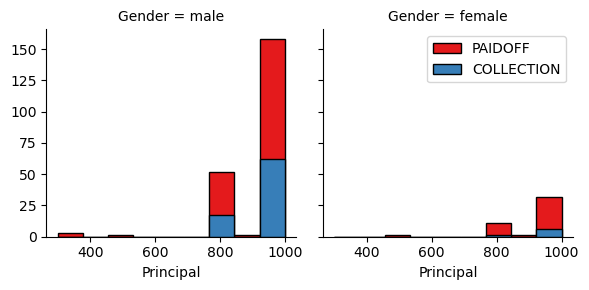

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

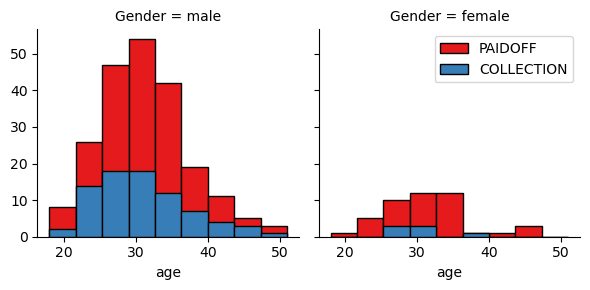

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre procesamiento: selección/extracción de características


### Veamos el día de la semana en que la gente obtuvo el préstamo


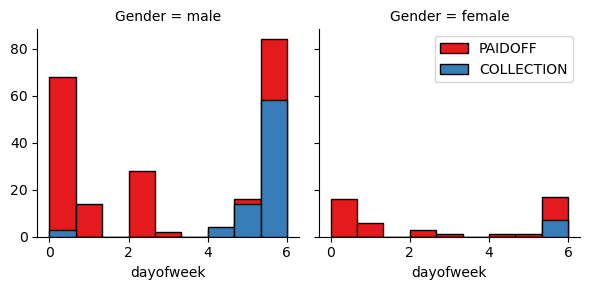

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Observamos que la gente que obtuvo el préstamo al final de la semana no lo pagó. Utilicemos la binarización para establecer unops valores límite menores de 4


In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convertir características categóricas en valores numéricos


Observemos la característica de genero:


In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% de las mujeres pagan sus prestamos mientras que el 73% de los hombres lo hacen.


Convirtamos en 0 a los hombres y a las mujeres en 1:


In [15]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## Codificación One Hot

#### ¿Qué hay acerca de la educación?


In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Característica antes de la codificación One Hot


In [17]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Utilice la técnica de codificación One Hot para transformar las variables categóricas en binarias y agrégelas al dataframe de características


In [18]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Selección de característica


Definamos los conjuntos de características, X:


In [19]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


¿Cuales son nuestras etiquetas?


In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Datos Normalizados


La estandarización de los datos le da a estos una media de cero y varianza con valor de la unidad (tecnicamente debería hacerse despues de la división entre grupos de prueba y entrenamiento)


In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Clasificación


Ahora es su turno, utilice el conjunto de entrenamiento para construir un modelo preciso. Despues use el conjunto de validación para reportar la precisión del modelo.
Deberá utilizar el siguiente algoritmo:

*   K Nearest Neighbor(KNN)
*   Arbol de Decisión
*   Maquina de Soporte Vectorial (SVM)
*   Regresión Logística

**Observaciónes:**

*   Puede ir arriba y cambiar el pre procesamiento, la selección y extracción de características, etc, para mejorar el modelo.
*   Deberá utilizar alguna de las librerías para el desarrollo de algoritmos de clasificación; ya sea scikit-learn, Scipy o Numpy
*   Deberá incluir el código del algoritmo en las siguientes celdas.


# K Nearest Neighbor(KNN)

Observación: Deberá encontrar el mejor valor de k para construir el modelo con la mejor eficacia.
**Advertencia:** No deberá utilizar **loan_test.csv** para encontrar el mejor valor de k, sin embargo, puede dividir train_loan.csv para entrenamiento y pruebas para encontrar el mejor valor de **k**.


In [22]:
from sklearn.model_selection import train_test_split # importando biblioteca para separar os dados 
from sklearn.neighbors import KNeighborsClassifier as knnn # biblioteca para o modelo KNN
from sklearn import metrics # biblioteca que metrifica os resultados do modelo 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)


In [23]:
k=4 # k escolhido de forma manual
neigh = knnn(n_neighbors=k).fit(x_train, y_train) #treinando o modelo knn
Yhat = neigh.predict(x_test) # predizendo valores 
print("Conjunto de certeza do treino:",metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Conjunto de certeza dos dados de teste:", metrics.accuracy_score(y_test, Yhat))

Conjunto de certeza do treino: 0.7934782608695652
Conjunto de certeza dos dados de teste: 0.7714285714285715


C:\Users\lucre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lucre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [24]:
ks = 10 # Iremos testar os ks de n = 0 até  n = 9
mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks - 1))
for n in range(1, ks):
    neigh = knnn(n_neighbors=n).fit(x_train, y_train)
    Yhat = neigh.predict(x_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, Yhat)
    std_acc[n - 1] = np.std(Yhat == y_test)/np.sqrt(Yhat.shape[0])
mean_acc, std_acc

C:\Users\lucre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lucre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

(array([0.71428571, 0.74285714, 0.78571429, 0.77142857, 0.77142857,
        0.72857143, 0.78571429, 0.78571429, 0.8       ]),
 array([0.05399492, 0.05223852, 0.04904333, 0.05018915, 0.05018915,
        0.05315141, 0.04904333, 0.04904333, 0.04780914]))

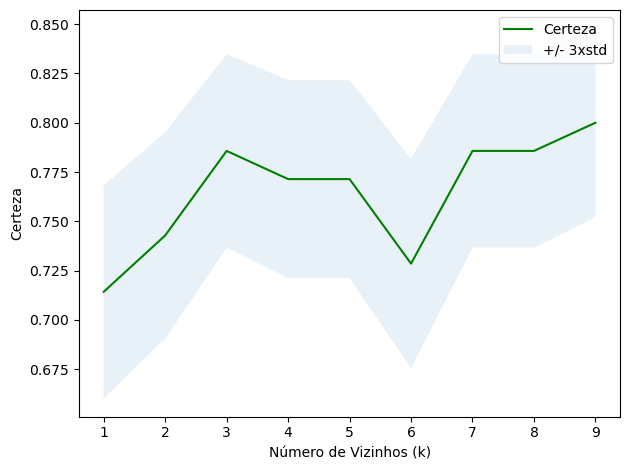

A melhor apróx. de certeza foi de 0.8 com K= 9


In [25]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(('Certeza','+/- 3xstd'))
plt.ylabel("Certeza")
plt.xlabel('Número de Vizinhos (k)')
plt.tight_layout()
plt.show()
print('A melhor apróx. de certeza foi de', mean_acc.max(),'com K=', mean_acc.argmax() + 1)


In [25]:
k=9
neigh = knnn(n_neighbors=k).fit(x_train, y_train)
Yhat = neigh.predict(x_test)
print("Conjunto de certeza do treino:",metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Conjunto de certeza dos dados de teste:", metrics.accuracy_score(y_test, Yhat))


Conjunto de certeza do treino: 0.782608695652174
Conjunto de certeza dos dados de teste: 0.8


C:\Users\lucre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\lucre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Arbol de Decisión


In [26]:
from sklearn.model_selection import train_test_split # importando biblioteca para separar os dados 
from sklearn.tree import DecisionTreeClassifier as Dtree # biblioteca para o modelo decision tree
from sklearn import metrics # biblioteca que metrifica os resultados do modelo 
from sklearn import tree
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

A precisão do modelo foi de: 0.7714285714285715
0.7714285714285715


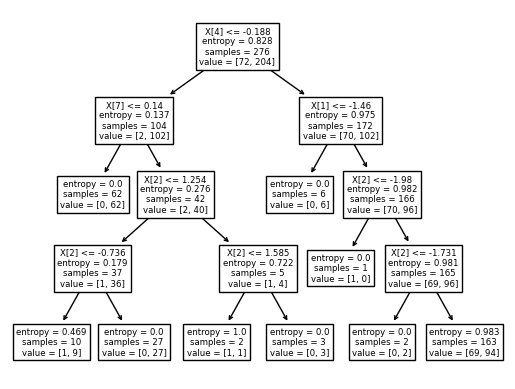

In [47]:
drugTree = Dtree(criterion = 'entropy', max_depth = 4) # Arvore com 4 camadas definindo o objeto 
drugTree.fit(x_train, y_train) # Treinando o modelo
predTree = drugTree.predict(x_test) # Predição
print("A precisão do modelo foi de:", metrics.accuracy_score(y_test, predTree))
tree.plot_tree(drugTree)
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, predTree ,pos_label = "PAIDOFF"))

A maior precisão foi de 0.8 usando max_depth = 1


[Text(0.5, 0.75, 'X[4] <= -0.188\nentropy = 0.828\nsamples = 276\nvalue = [72, 204]'),
 Text(0.25, 0.25, 'entropy = 0.137\nsamples = 104\nvalue = [2, 102]'),
 Text(0.75, 0.25, 'entropy = 0.975\nsamples = 172\nvalue = [70, 102]')]

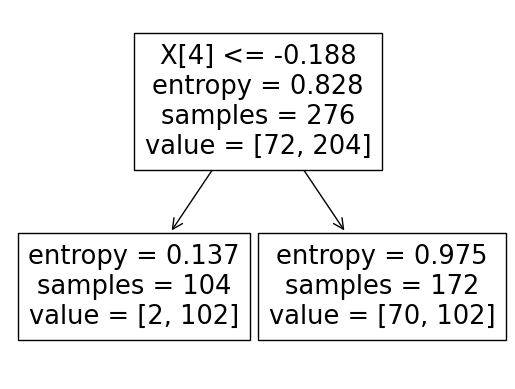

In [28]:
import numpy as np # Encontrando o melhor depth para o modelo de Decision Tree
tr = []
sc = []
for i in range(10): # Testando até 10 camadas
    i = 1 + i
    drugTree = Dtree(criterion = 'entropy', max_depth = i) # Arvore com 4 camadas definindo o objeto 
    drugTree.fit(x_train, y_train) # Treinando o modelo
    predTree = drugTree.predict(x_test) # Predição
    tr.append(i)
    sc.append(metrics.accuracy_score(y_test, predTree))
max_score = None
max_idin = None
for idin, num in enumerate(sc): # Selecionando o melhor depth a partir do maior valor de score
    if (max_score is None or num > max_score):
        max_score = num
        max_idin = idin
indice = tr[max_idin]
print("A maior precisão foi de", max_score, "usando max_depth =", indice)

drugTree = Dtree(criterion = 'entropy', max_depth = indice) # Arvore com 4 camadas definindo o objeto 
drugTree.fit(x_train, y_train) # Treinando o modelo
predTree = drugTree.predict(x_test) # Predição
tree.plot_tree(drugTree)

# Maquina de Soporte Vectorial (SVM)


In [45]:
from sklearn import svm
from sklearn.metrics import accuracy_score
mac = svm.SVC(kernel='rbf')
mac.fit(x_train, y_train)
Yhat = mac.predict(x_test)
print(accuracy_score(y_test, Yhat))
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, Yhat ,pos_label = "PAIDOFF"))

0.7857142857142857
0.782608695652174


In [30]:
functions = ['poly','rbf', 'linear']
acc = []
for i in range(len(functions)):
    kernel = functions[i]
    mac = svm.SVC(kernel = kernel)
    mac.fit(x_train, y_train)
    Yhat = mac.predict(x_test)
    acc.append(accuracy_score(y_test, Yhat))
for i in range(len(acc)):
    print("O kernel", functions[i], "resultou na precisão", acc[i])

O kernel poly resultou na precisão 0.7857142857142857
O kernel rbf resultou na precisão 0.7857142857142857
O kernel linear resultou na precisão 0.8


# Regresión Logística


In [44]:
from sklearn.linear_model import LogisticRegression as lr
ltr = lr(C=0.01, solver='liblinear').fit(x_train, y_train)
Yhat = ltr.predict(x_test)
# Yhat_prob = lr.predict_proba(X) # nÃO É FEITO POIS NÃO HÁ DADOS CATEGÓRICOS
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, Yhat ,pos_label = "PAIDOFF"))

0.8


<h2>¿Quiere aprender mas?</h2>

IBM SPSS Modeler es una plataforma para el análisis que contiene muchos algoritmos de aprendizaje automático (machine learning). Ha sido diseñado con el fin de ofrecer predicciones inteligentes a las decisiones hechas por personas, grupos, sistemas - con la compañia como un todo. Una prueba gratuita esta disponible a traves de este curso desde aqui: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">SPSS Modeler</a>

Además, puede utilizar Watson Studio para ejecutar estos cuardernos mas rápido y con conjuntos de datos mas grandes. Watson Studio es la solución líder de IBM en la nube para científicos de datos, contruido por científicos de datos. Con los cuadernos de Jupyter, RStudio, Apache Spark y librerías pre instaladas en la nube, Watson Studio permite a los científicos de datos colaborar en sus proyectos sin necesidad de instalar nada. Unase a la gran comunidad de usuarios de Watson Studio hoy con un cuenta gratuita en <a href="https://cloud.ibm.com/registration/trial?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Watson Studio</a>

<h3>Gracias por terminar esta lección</h3>

<h4>Autor:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD es un Científico de Datos para IBM con una trayectoria de desarrollo de aplicaciones a nivel empresarial que han ayudado a mejorar la habilidad de transformar información en conocimiento practico. Es un investigador en el campo de la minería de datos y experto en el desarrollo de métodos analíticos avanzados como son el aprendizaje automático y el modelado estadístico de grandes conjuntos de datos.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">MIT License</a>.</p>
